In [1]:
import itertools
from qevo import *
import qutip
import numpy as np
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.ioff()

In [2]:
def c(*gate_ls):
    l, *o = gate_ls
    if o:
        r, *o = o
        lr = tuple(r[l[_]] for _ in range(16))
        return c(lr,*o)
    else:
        return l
def order(el):
    el_c = el
    o = 1
    while el_c!=tuple(range(16)):
        el_c = c(el_c,el)
        o += 1
    return o
def permutation2_to_index_map(permutation2):
    return [(_//4,_%4) for _ in permutation2]
def permute2(probs, targets, permutation2_index, N):
    slices_a = [slice(None)]*N
    slices_b = [slice(None)]*N
    t1, t2 = targets
    new_probs = probs.copy()
    for (l1, l2),(r1,r2) in zip(itertools.product(range(4), repeat=2),permutation2_index):
        slices_a[t1] = l1
        slices_a[t2] = l2
        slices_b[t1] = r1
        slices_b[t2] = r2
        new_probs[tuple(slices_b)] = probs[tuple(slices_a)]
    return new_probs
def calc(ind, meas, qs=None):
    f = 0.9
    inf = 1-f
    p2 = 0.99
    probs = get_new_probs(2, f, qs)
    probs_perm = probs
    probs_perm = permute2(probs, [0,1], ind, 2)
    probs_dep = depolarize2(probs_perm, [0,1], p2)
    assert abs(np.sum(probs_dep)-1)<1e-9
    return np.round(measure(probs_dep, 1, [0,meas], 2, f, p2), decimals=7) # rounded to permit hashing

In [3]:
import pickle
with open('permutation_subgroup.pickle','rb') as _f:
    generated = pickle.load(_f)

In [4]:
generated[0]

(9, 6, 14, 1, 3, 12, 4, 11, 10, 5, 13, 2, 0, 15, 7, 8)

In [4]:
len(set(generated))

11520

In [5]:
generated = [_ for _ in generated if _[0] in {0}] # {0,1,2,3}]

In [7]:
len(generated)

720

In [8]:
11520/2880

4.0

In [9]:
11520/720

16.0

In [10]:
orders = [order(_) for _ in generated]

In [11]:
Counter(orders)

Counter({1: 1, 2: 75, 3: 80, 4: 180, 5: 144, 6: 240})

In [12]:
index_maps = [permutation2_to_index_map(_) for _ in generated]
fids = [tuple([fidelity(calc(ind, _)) for _ in [1,2,3]])
        for ind in index_maps]
Counter(fids)

Counter({(0.89164140000000003, 0.91659669999999982, 0.91659669999999982): 216,
         (0.89287620000000012, 0.89287620000000012, 0.89287620000000012): 72,
         (0.91659669999999982, 0.89164140000000003, 0.91659669999999982): 216,
         (0.91659669999999982, 0.91659669999999982, 0.89164140000000003): 216})

In [13]:
index_maps = [permutation2_to_index_map(_) for _ in generated]
fids = [tuple([fidelity(calc(ind, _, qs=[0.1/6,0.2/6,0.3/6])) for _ in [1,2,3]])
        for ind in index_maps]
Counter(fids)

Counter({(0.88896469999999994, 0.89121040000000007, 0.90253519999999987): 12,
         (0.88896469999999994, 0.90253519999999987, 0.89121040000000007): 12,
         (0.88927669999999992, 0.89166520000000005, 0.91687750000000001): 12,
         (0.88927669999999992, 0.91687750000000001, 0.89166520000000005): 12,
         (0.89115, 0.91649190000000003, 0.93044619999999989): 12,
         (0.89115, 0.93044619999999989, 0.91649190000000003): 12,
         (0.89118019999999998, 0.90250420000000009, 0.91626850000000004): 12,
         (0.89118019999999998, 0.91626850000000004, 0.90250420000000009): 12,
         (0.89121040000000007, 0.88896469999999994, 0.90253519999999987): 12,
         (0.89121040000000007, 0.90253519999999987, 0.88896469999999994): 12,
         (0.89161769999999996, 0.9168269, 0.94518700000000011): 12,
         (0.89161769999999996, 0.94518700000000011, 0.9168269): 12,
         (0.89164140000000003, 0.90282729999999989, 0.93081209999999992): 12,
         (0.89164140000000003,

In [14]:
fids = [fidelity(calc(ind, 3)) for ind in index_maps]
c = Counter(fids)
c

Counter({0.89164140000000003: 216,
         0.89287620000000012: 72,
         0.91659669999999982: 432})

In [16]:
fids = [fidelity(calc(ind, 3, qs=[0.1/6,0.2/6,0.3/6])) for ind in index_maps]
c = Counter(fids)
c

Counter({0.88896469999999994: 24,
         0.88927669999999992: 24,
         0.89115: 24,
         0.89118019999999998: 24,
         0.89121040000000007: 24,
         0.89161769999999996: 24,
         0.89164140000000003: 24,
         0.89166520000000005: 24,
         0.8920691999999999: 24,
         0.89208679999999996: 24,
         0.89210430000000007: 24,
         0.89275119999999986: 24,
         0.89287620000000012: 24,
         0.89299739999999994: 24,
         0.90250420000000009: 24,
         0.90253519999999987: 24,
         0.90282729999999989: 24,
         0.90316919999999989: 24,
         0.91626850000000004: 24,
         0.91649190000000003: 24,
         0.9168269: 24,
         0.91687750000000001: 24,
         0.91692530000000017: 24,
         0.91719970000000006: 24,
         0.93044619999999989: 24,
         0.93081209999999992: 24,
         0.93112630000000018: 24,
         0.93114580000000002: 24,
         0.94518700000000011: 24,
         0.94553280000000017: 24})

In [17]:
fids = [fidelity(calc(ind, 3)) for ind in index_maps]
max_fid = max(fids)
good_index_maps = [m for m,f in zip(index_maps, fids) if f==max_fid]
good_permutations = [m for m,f in zip(generated, fids) if f==max_fid]

In [18]:
len(good_index_maps)

432

In [19]:
fids = [fidelity(calc(ind, 3, qs=[0.1/6,0.2/6,0.3/6])) for ind in good_index_maps]
c = Counter(fids)
c

Counter({0.88896469999999994: 24,
         0.88927669999999992: 24,
         0.90250420000000009: 24,
         0.90253519999999987: 24,
         0.90282729999999989: 24,
         0.90316919999999989: 24,
         0.91626850000000004: 24,
         0.91649190000000003: 24,
         0.9168269: 24,
         0.91687750000000001: 24,
         0.91692530000000017: 24,
         0.91719970000000006: 24,
         0.93044619999999989: 24,
         0.93081209999999992: 24,
         0.93112630000000018: 24,
         0.93114580000000002: 24,
         0.94518700000000011: 24,
         0.94553280000000017: 24})

In [20]:
ABCDsT = [ABCD(calc(_,3)) for _ in good_index_maps]
ABCDsC = np.array([(*k,v) for k,v in Counter(ABCDsT).items()])

In [22]:
import ternary
def plot_fid_ternary(ABCDs, size=None, alpha=1, vminmax=None):
    f, tax = ternary.figure()
    f.set_size_inches(6, 4)
    inf = 1-ABCDs[:,[0]]
    if vminmax is None:
        norm = mpl.colors.Normalize(vmax=max(inf),vmin=min(inf))
    else:
        norm = mpl.colors.Normalize(vmax=vminmax[1],vmin=vminmax[0])
    clabel = 'Infidelity 1-Φ+'
    cmap = plt.cm.viridis
    if size is None:
        size = ABCDs[:,4]
    tax.scatter(ABCDs[:,[3,2,1]]/inf, c=inf, s=size, cmap=cmap, norm=norm, alpha=alpha)
    cax = f.add_axes([0.83, 0.2, 0.02, 0.6])
    cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, spacing='proportional')
    cb.set_label(clabel)
    tax.ax.set_aspect('equal')
    tax.boundary(linewidth=0.1)
    tax.gridlines(color="gray", multiple=0.1, linewidth=0.5)
    tax.ax.set_axis_off()
    tax.ticks(axis='lbr', multiple=0.2, linewidth=2)
    tax.bottom_axis_label('relative Φ-')
    tax.right_axis_label('relative Ψ+\n')
    tax.left_axis_label('relative Ψ-\n')
    return f, tax

Counter({144.0: 3})


/home/stefan/python_lab35/lib/python3.5/site-packages/matplotlib/colorbar.py:810: RuntimeWarning: invalid value encountered in double_scalars
  automin = (y[2] - y[1]) / clen
/home/stefan/python_lab35/lib/python3.5/site-packages/matplotlib/colorbar.py:811: RuntimeWarning: invalid value encountered in double_scalars
  automax = (y[-2] - y[-3]) / clen
/home/stefan/python_lab35/lib/python3.5/site-packages/matplotlib/axes/_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


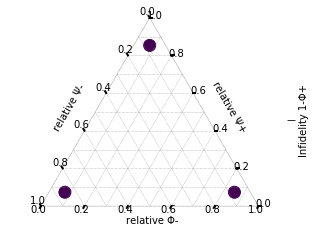

In [23]:
plt.close('all')
print(Counter(ABCDsC[:,4]))
plot_fid_ternary(ABCDsC)[0]

Counter({16.0: 27})


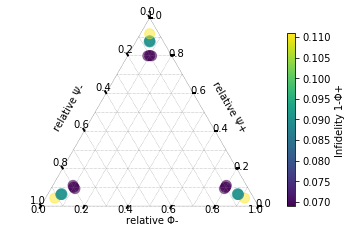

In [24]:
inf = 1-0.9
qs = np.array([1/4,2/4,1/4])*inf
ABCDsT = [ABCD(calc(_,3, qs)) for _ in good_index_maps]
ABCDsC = np.array([(*k,v) for k,v in Counter(ABCDsT).items()])
print(Counter(ABCDsC[:,4]))
plot_fid_ternary(ABCDsC, size=100, alpha=0.5)[0]

Counter({4.0: 108})


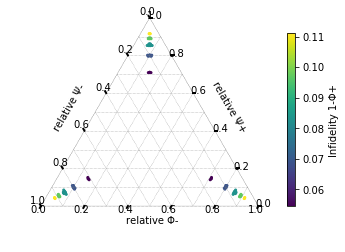

In [25]:
qs = np.array([1/6,2/6,3/6])*inf
ABCDsT = [ABCD(calc(_,3, qs)) for _ in good_index_maps]
ABCDsC = np.array([(*k,v) for k,v in Counter(ABCDsT).items()])
print(Counter(ABCDsC[:,4]))
plot_fid_ternary(ABCDsC)[0]

In [26]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [27]:
log = []
import ternary
def plot_fid_ternary(ABCDs, size=None, alpha=1, vminmax=[0,1], bests=None, standards=None):
    f, tax = ternary.figure()
    f.set_size_inches(12, 8)
    inf = 1-ABCDs[:,[0]]
    norm = mpl.colors.Normalize(vmax=vminmax[1],vmin=vminmax[0])
    clabel = 'Infidelity 1-Φ+'
    cmap = plt.cm.viridis
    if bests is not None:
        infb = 1-bests[:,[0]]
        tax.plot(bests[:,[3,2,1]]/infb, marker='o', color='white', markeredgecolor='red', markersize=10, linewidth=0, zorder=-10)
    if standards is not None:
        infs = 1-standards[:,[0]]
        tax.plot(standards[:,[3,2,1]]/infs, marker='x', color='black', markeredgecolor='red', markersize=10, linewidth=0, zorder=-9)
    if size is None:
        size = ABCDs[:,4]
    tax.scatter(ABCDs[:,[3,2,1]]/inf, c=inf, s=size, cmap=cmap, norm=norm, alpha=alpha)
    cax = f.add_axes([0.83, 0.2, 0.02, 0.6])
    cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, spacing='proportional')
    cax.hlines((np.unique(inf)-vminmax[0])/(vminmax[1]-vminmax[0]),0,1, alpha=0.5, linewidth=1)
    cb.set_label(clabel)
    tax.ax.set_aspect('equal')
    tax.boundary(linewidth=0.1)
    tax.gridlines(color="gray", multiple=0.1, linewidth=0.5)
    tax.ax.set_axis_off()
    tax.ticks(axis='lbr', multiple=0.2, linewidth=2)
    tax.bottom_axis_label('relative Φ-')
    tax.right_axis_label('relative Ψ+\n')
    tax.left_axis_label('relative Ψ-\n')
    return f, tax

In [28]:
def calc_standard(meas, qs=None):
    f = 0.9
    inf = 1-f
    p2 = 0.99
    res = []
    for targets, i_pair in zip([[0,1],  [1,0],  [0,1],    [0,1],   [1,0]],
                               [cnot_i, cnot_i, cphase_i, cpnot_i, cpnot_i]):
        probs = get_new_probs(2, f, qs)
        probs_perm = probs
        probs_perm = permute2_by_pairs(probs, targets, i_pair, 2)
        probs_dep = depolarize2(probs_perm, [0,1], p2)
        assert abs(np.sum(probs_dep)-1)<1e-9
        res.append(ABCD(np.round(measure(probs_dep, 1, [0,meas], 2, f, p2), decimals=7))) # rounded to permit hashing
    return res

In [29]:
def wrt_p_r(B=5.,C=5.,D=5., perm=[0,1,2]):
    plt.close('all')
    f = 0.9
    inf = 1-f
    qs = np.array([B,C,D])*1.
    qs /= np.sum(qs)
    qs *= inf
    qs = qs[perm]
    ABCDsT = [ABCD(calc(_,3, qs)) for _ in good_index_maps]
    ABCDsC = np.array([(*k,v) for k,v in Counter(ABCDsT).items()])
    best = np.max(ABCDsC[:,0])
    ABCDsB = np.array([(*k,v) for k,v in Counter(ABCDsT).items() if abs(k[0]-best)<1e-6])
    fig, t = plot_fid_ternary(ABCDsC, vminmax=[0.02,0.18], size=45, alpha=1,
                              bests=ABCDsB, standards=np.array(calc_standard(3, qs)))
    display(fig)
    print("%d sets of %d elements"%[(v,k) for k,v in Counter(ABCDsC[:,4]).items()][0])
    print("%d of the sets are optimal"%len(ABCDsB))
    print("infidelity",1-best)
    #print(np.argwhere(abs(np.array(ABCDsT)[:,0]-best)<1e-6))
    #return fig

In [30]:
perm123 = [list(_) for _ in itertools.permutations([0,1,2])]
interactive_plot = interactive(wrt_p_r, B=(1,10), C=(1,10), D=(1,10), perm=perm123, continuous_update=False)
interactive_plot.layout.height = '700px'
interactive_plot

# TODO: The group structure starting from CNOT

In [34]:
letters = [''.join(_) for _ in itertools.product('ABCD', repeat=2)]
to_letter_d = dict(zip(range(16),letters))
to_index_d  = dict(zip(letters,range(16)))

In [35]:
cnot = tuple([to_index_d[_] for (__, _) in cpnot_l])

In [47]:
def c(*gate_ps):
    l, *o = gate_ps
    if o:
        r, *o = o
        lr = tuple(r[_] for _ in l)
        return c(lr,*o)
    else:
        return l

In [48]:
c(cnot, cnot)

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15)

In [45]:
c(list(range(16)), cnot) == cnot

True

In [36]:
perms_1 = [
    (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15),
    (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15),
    (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15),
    (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15),
    (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15),
    (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15),
    (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15),
]

Counter({0.88896469999999994: 24,
         0.88927669999999992: 24,
         0.90250420000000009: 24,
         0.90253519999999987: 24,
         0.90282729999999989: 24,
         0.90316919999999989: 24,
         0.91626850000000004: 24,
         0.91649190000000003: 24,
         0.9168269: 24,
         0.91687750000000001: 24,
         0.91692530000000017: 24,
         0.91719970000000006: 24,
         0.93044619999999989: 24,
         0.93081209999999992: 24,
         0.93112630000000018: 24,
         0.93114580000000002: 24,
         0.94518700000000011: 24,
         0.94553280000000017: 24})

In [21]:
cat_1 = []

[(0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 (0, 3),
 

In [33]:
for (a,b),(p,q) in zip(itertools.product('ABCD', repeat=2), itertools.product('Fqqq', repeat=2)):
    print('%s%s - %s%s'%(a,b,p,q))

AA - FF
AB - Fq
AC - Fq
AD - Fq
BA - qF
BB - qq
BC - qq
BD - qq
CA - qF
CB - qq
CC - qq
CD - qq
DA - qF
DB - qq
DC - qq
DD - qq
